In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


In [ ]:
data = yf.download('TCS.NS', start='2024-01-01', end='2024-07-01')
data.columns = ['_'.join(col) for col in data.columns]
data.head()

/tmp/ipython-input-10-426806388.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('TCS.NS', start='2024-01-01', end='2024-07-01')
[*********************100%***********************]  1 of 1 completed


,Close_TCS.NS,High_TCS.NS,Low_TCS.NS,Open_TCS.NS,Volume_TCS.NS
Date,,,,,
2024-01-01,3702.445068,3722.749111,3665.431210,3681.946538,825907
2024-01-02,3675.340332,3702.445041,3659.845116,3702.445041,1344068
2024-01-03,3586.497803,3664.314238,3581.931848,3659.602417,1803075
2024-01-04,3562.259033,3612.970756,3546.909446,3596.212556,3598144
2024-01-05,3631.331543,3640.900812,3570.079302,3570.224931,1963127


In [ ]:
data['MA10'] = data['Close_TCS.NS'].rolling(window=10).mean()
data['MA50'] = data['Close_TCS.NS'].rolling(window=50).mean()
data['Tomorrow'] = data['Close_TCS.NS'].shift(-1)
data['Target'] = np.where(data['Tomorrow'] > data['Close_TCS.NS'], 1, 0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.42857142857142855
Confusion Matrix:
 [[3 2]
 [6 3]]


In [ ]:
print(data.columns)


Index(['Close_TCS.NS', 'High_TCS.NS', 'Low_TCS.NS', 'Open_TCS.NS',
       'Volume_TCS.NS', 'MA10', 'MA50', 'Tomorrow', 'Target'],
      dtype='object')


In [ ]:
data.rename(columns=lambda x: x.split('_')[0], inplace=True)
print(data.columns)  # Should now show 'Close', 'High', 'Low', etc.


Index(['Close', 'High', 'Low', 'Open', 'Volume', 'MA10', 'MA50', 'Tomorrow',
       'Target'],
      dtype='object')


In [ ]:
data['MA10'] = data['Close'].rolling(window=10).mean()
data['MA50'] = data['Close'].rolling(window=50).mean()


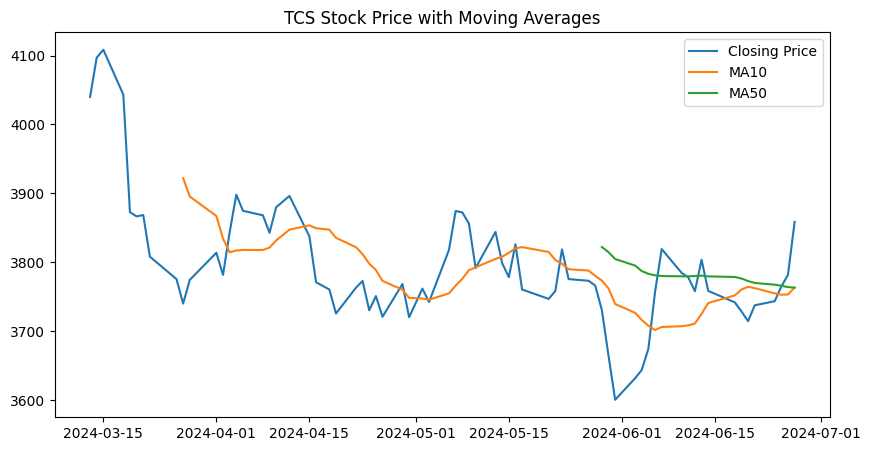

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['MA10'], label='MA10')
plt.plot(data['MA50'], label='MA50')
plt.title('TCS Stock Price with Moving Averages')
plt.legend()
plt.show()
